<a href="https://colab.research.google.com/github/RHBM-RAPHAEL/My-Linktree/blob/main/Avalia%C3%A7%C3%A3o_de_Qualidade_de_Atendimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== TESTE DO SISTEMA DE LÓGICA NEBULOSA ===

Caso 1: Atendimento rápido e muito cordial
  Tempo de espera: 8 minutos
  Cordialidade: 9/10
  Graus de pertinência:
    Excelente: 1.00
    Boa:       0.00
    Regular:   0.00
    Ruim:      0.00
  Qualidade final: 9.00/10

Caso 2: Atendimento médio
  Tempo de espera: 15 minutos
  Cordialidade: 6/10
  Graus de pertinência:
    Excelente: 0.00
    Boa:       0.50
    Regular:   0.50
    Ruim:      0.00
  Qualidade final: 6.00/10

Caso 3: Atendimento demorado e pouco cordial
  Tempo de espera: 35 minutos
  Cordialidade: 3/10
  Graus de pertinência:
    Excelente: 0.00
    Boa:       0.00
    Regular:   0.00
    Ruim:      1.00
  Qualidade final: 2.00/10

Caso 4: Bom atendimento geral
  Tempo de espera: 12 minutos
  Cordialidade: 13/10
  Graus de pertinência:
    Excelente: 0.80
    Boa:       0.20
    Regular:   0.00
    Ruim:      0.00
  Qualidade final: 8.60/10



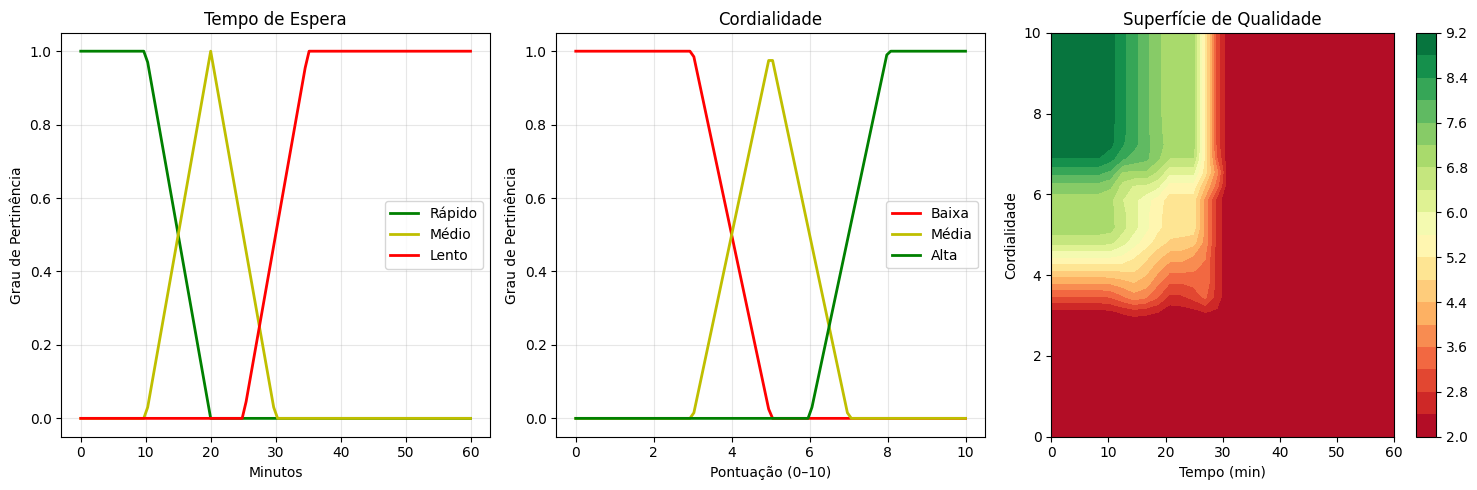

In [4]:
# ============================================
# Célula 1: Importar bibliotecas e configurar gráficos
# ============================================
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")
plt.rcParams["figure.figsize"] = (10, 6)


# ============================================
# Célula 2: Funções de pertinência — Tempo de Espera
# ============================================
def tempo_rapido(x: float) -> float:
    """Função de pertinência para tempo rápido (0–20 min; pico até ~10)."""
    if x <= 10:
        return 1.0
    elif x <= 20:
        return (20 - x) / 10
    else:
        return 0.0


def tempo_medio(x: float) -> float:
    """Função de pertinência para tempo médio (10–30 min)."""
    if x <= 10:
        return 0.0
    elif x <= 20:
        return (x - 10) / 10
    elif x <= 30:
        return (30 - x) / 10
    else:
        return 0.0


def tempo_lento(x: float) -> float:
    """Função de pertinência para tempo lento (>= 25 min)."""
    if x <= 25:
        return 0.0
    elif x <= 35:
        return (x - 25) / 10
    else:
        return 1.0


# ============================================
# Célula 3: Funções de pertinência — Cordialidade
# ============================================
def cordialidade_baixa(x: float) -> float:
    """Cordialidade baixa (0–5)."""
    if x <= 3:
        return 1.0
    elif x <= 5:
        return (5 - x) / 2
    else:
        return 0.0


def cordialidade_media(x: float) -> float:
    """Cordialidade média (3–7)."""
    if x <= 3:
        return 0.0
    elif x <= 5:
        return (x - 3) / 2
    elif x <= 7:
        return (7 - x) / 2
    else:
        return 0.0


def cordialidade_alta(x: float) -> float:
    """Cordialidade alta (>= 6)."""
    if x <= 6:
        return 0.0
    elif x <= 8:
        return (x - 6) / 2
    else:
        return 1.0


# ============================================
# Célula 4: Regras do sistema fuzzy + Defuzzificação
# ============================================
def avaliar_atendimento(tempo: float, cordialidade: float) -> dict:
    """
    Regras:
      1) Se tempo é RÁPIDO E cordialidade é ALTA  → EXCELENTE
      2) Se tempo é RÁPIDO E cordialidade é MÉDIA → BOA
      3) Se tempo é MÉDIO  E cordialidade é ALTA  → BOA
      4) Se tempo é MÉDIO  E cordialidade é MÉDIA → REGULAR
      5) Caso contrário                           → RUIM
    """
    # Graus de pertinência (Tempo)
    t_rapido = tempo_rapido(tempo)
    t_medio = tempo_medio(tempo)
    t_lento = tempo_lento(tempo)

    # Graus de pertinência (Cordialidade)
    c_baixa = cordialidade_baixa(cordialidade)
    c_media = cordialidade_media(cordialidade)
    c_alta = cordialidade_alta(cordialidade)

    # Regras (operador E = min; OR = max)
    excelente = min(t_rapido, c_alta)
    boa = max(min(t_rapido, c_media), min(t_medio, c_alta))
    regular = min(t_medio, c_media)
    ruim = max(
        min(t_lento, c_baixa),
        min(t_lento, c_media),
        min(t_lento, c_alta),
        min(t_rapido, c_baixa),
        min(t_medio, c_baixa),
    )

    # Defuzzificação (pontos de saída representativos: 9/7/5/2)
    soma_pesos = excelente + boa + regular + ruim
    qualidade_final = (excelente * 9 + boa * 7 + regular * 5 + ruim * 2) / max(soma_pesos, 1e-9)

    return {
        "excelente": excelente,
        "boa": boa,
        "regular": regular,
        "ruim": ruim,
        "qualidade_final": qualidade_final,
    }


# ============================================
# Célula 5: Testes rápidos do sistema
# ============================================
def testar_sistema() -> None:
    casos_teste = [
        {"tempo": 8, "cordialidade": 9, "descricao": "Atendimento rápido e muito cordial"},
        {"tempo": 15, "cordialidade": 6, "descricao": "Atendimento médio"},
        {"tempo": 35, "cordialidade": 3, "descricao": "Atendimento demorado e pouco cordial"},
        {"tempo": 12, "cordialidade": 13, "descricao": "Bom atendimento geral"},
    ]

    print("=== TESTE DO SISTEMA DE LÓGICA NEBULOSA ===\n")
    for i, caso in enumerate(casos_teste, start=1):
        resultado = avaliar_atendimento(caso["tempo"], caso["cordialidade"])
        print(f"Caso {i}: {caso['descricao']}")
        print(f"  Tempo de espera: {caso['tempo']} minutos")
        print(f"  Cordialidade: {caso['cordialidade']}/10")
        print(f"  Graus de pertinência:")
        print(f"    Excelente: {resultado['excelente']:.2f}")
        print(f"    Boa:       {resultado['boa']:.2f}")
        print(f"    Regular:   {resultado['regular']:.2f}")
        print(f"    Ruim:      {resultado['ruim']:.2f}")
        print(f"  Qualidade final: {resultado['qualidade_final']:.2f}/10\n")


# ============================================
# Célula 6: Visualizações (funções de pertinência e superfície)
# ============================================
def plotar_funcoes_pertinencia() -> None:
    # --- Tempo de espera ---
    tempo_range = np.linspace(0, 60, 100)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(tempo_range, [tempo_rapido(t) for t in tempo_range], "g-", label="Rápido", linewidth=2)
    plt.plot(tempo_range, [tempo_medio(t) for t in tempo_range], "y-", label="Médio", linewidth=2)
    plt.plot(tempo_range, [tempo_lento(t) for t in tempo_range], "r-", label="Lento", linewidth=2)
    plt.title("Tempo de Espera")
    plt.xlabel("Minutos")
    plt.ylabel("Grau de Pertinência")
    plt.legend()
    plt.grid(True, alpha=0.3)

    # --- Cordialidade ---
    cord_range = np.linspace(0, 10, 100)

    plt.subplot(1, 3, 2)
    plt.plot(cord_range, [cordialidade_baixa(c) for c in cord_range], "r-", label="Baixa", linewidth=2)
    plt.plot(cord_range, [cordialidade_media(c) for c in cord_range], "y-", label="Média", linewidth=2)
    plt.plot(cord_range, [cordialidade_alta(c) for c in cord_range], "g-", label="Alta", linewidth=2)
    plt.title("Cordialidade")
    plt.xlabel("Pontuação (0–10)")
    plt.ylabel("Grau de Pertinência")
    plt.legend()
    plt.grid(True, alpha=0.3)

    # --- Superfície de qualidade ---
    plt.subplot(1, 3, 3)
    T, C = np.meshgrid(np.linspace(0, 60, 30), np.linspace(0, 10, 30))
    Z = np.zeros_like(T, dtype=float)

    for i in range(T.shape[0]):
        for j in range(T.shape[1]):
            res = avaliar_atendimento(float(T[i, j]), float(C[i, j]))
            Z[i, j] = res["qualidade_final"]

    contour = plt.contourf(T, C, Z, levels=20, cmap="RdYlGn")
    plt.colorbar(contour)
    plt.title("Superfície de Qualidade")
    plt.xlabel("Tempo (min)")
    plt.ylabel("Cordialidade")

    plt.tight_layout()
    plt.show()


# ============================================
# Execução direta
# ============================================
if __name__ == "__main__":
    testar_sistema()
    plotar_funcoes_pertinencia()